In [1]:
#第十三章 直方图处理
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)

Opencv官网上，给出了三个重要的概念：DIMS、BINS、RANGE
DIMS: 绘制直方图时，收集的参数的数量，一般情况下，只收集灰度图像像素值，因而dims = 1;
BINS：箱子数，参数子集的数目。在处理数据的过程中，有时需要将众多的数据划分成若干组，再进行分析
RANGES：表示要统计的灰度级范围，一般为[0,255]

matplotlib.pyplot中的hist()函数能够方便地绘制直方图；
Opencv中的 cv2.calcHist()能够计算统计直方图，还可以在此基础上绘制图像的直方图

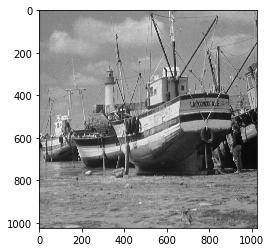

In [2]:
#使用Numpy绘制直方图
#matplotlib.pyplot.hist(X,BINS) 绘制直方图
#X:数据源，相当于像素值的值域，必须是一维的，图像的每个通道的数据通常都是二维的，需要用到ravel()函数降维
#BINS: BINS的具体值，表示灰度级的分组情况
o = cv2.imread("image\\boat.jpg")
show(o)


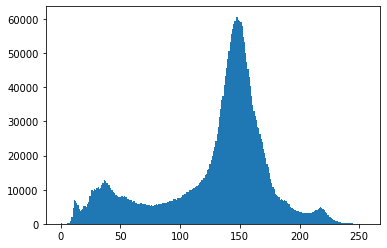

In [3]:
#由于无法显示两张图，所以分开来做
#b = a.ravel()进行降维
plt.hist(o.ravel(),256)
plt.show()

<class 'numpy.ndarray'>
(256, 1)
256


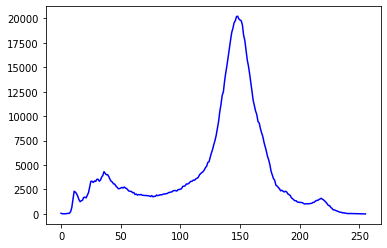

In [9]:
#cv2.clacHist()绘制直方图，语法格式如下
#hist = cv2.calcHist(images,channels,mask,histSize,ranges,accumulate)
#hist : 返回统计直方图，是一个一维数组
#images : 原始图像，需要用[]
#channels : 指定通道编号，编号需要用[]
#mask : 掩码，统计整幅图时，为None,统计部分图时，用到掩码图像
#histSize: BINS的值，需要用[]
#ranges : 像素值范围，例如[0,255]
#accumulate:累积标志，默认为False，一般情况不用设置
img = cv2.imread("image\\boat.jpg")
hist = cv2.calcHist([img],[0],None,[256],[0,255])
print(type(hist))
print(hist.shape)
print(hist.size)
#print(hist)
plt.plot(hist,color='b')
plt.show()

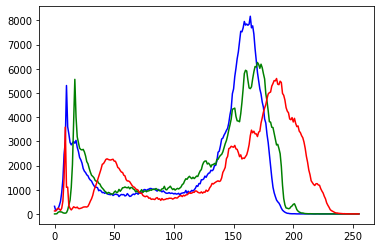

In [10]:
#在一张图上绘制BGR三幅直方图
o = cv2.imread("image\\girl.bmp")
histb = cv2.calcHist([o],[0],None,[256],[0,255])
histg = cv2.calcHist([o],[1],None,[256],[0,255])
histr = cv2.calcHist([o],[2],None,[256],[0,255])
plt.plot(histb,color = 'b')
plt.plot(histg,color='g')
plt.plot(histr,color='r')
plt.show()

使用掩码绘制直方图
bitwise_and 函数 实现按位与运算
对于黑白图，要显示的部分与255按位与，要隐藏的部分与0按位与

(576, 720)


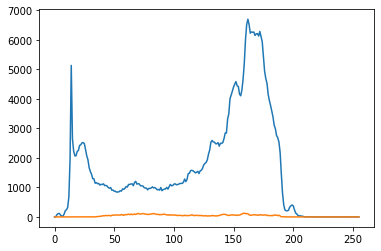

In [17]:
image = cv2.imread("image\\girl.bmp",cv2.IMREAD_GRAYSCALE)
print(image.shape)
mask = np.zeros(image.shape,np.uint8)
mask[200:300,200:300] = 255
histImage = cv2.calcHist([image],[0],None,[256],[0,255])
histMI = cv2.calcHist([image],[0],mask,[256],[0,255])
plt.plot(histImage)
plt.plot(histMI)
plt.show()

直方图均衡化
将像素值的灰度均匀分布，使得图像具有高对比度
使用cv2.equalizeHist()函数

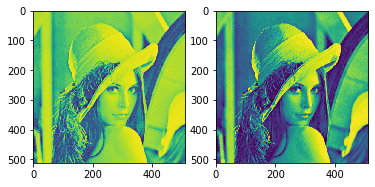

In [21]:
img = cv2.imread("image\\equ.bmp",cv2.IMREAD_GRAYSCALE)
#直方图均衡化处理
equ = cv2.equalizeHist(img)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(equ)
#这里可能是内部实现的问题，具体细节不好说，有可能是imread的时候并没有直接做图像从彩色向灰度的转化，
#而是在显示的时候才做的，如imshow，读的时候只是给了一个标记，表示这幅图像按灰度图像处理，
#而matplotlib的函数不识别这个标记，所以还是显示为彩色的图像


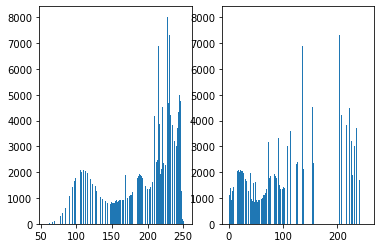

In [23]:
plt.subplot(1,2,1),plt.hist(img.ravel(),256)
plt.subplot(1,2,2),plt.hist(equ.ravel(),256)
plt.show()

为了正确显示灰度图像，需要对imshow进行参数设置
cmap = plt.cm.gray
plt.axis('off')
完整格式如下：
plt.imshow(img,cmap = plt.cm.gray),plt.axis('off')

(<matplotlib.image.AxesImage at 0x200048c9588>, (-0.5, 719.5, 575.5, -0.5))

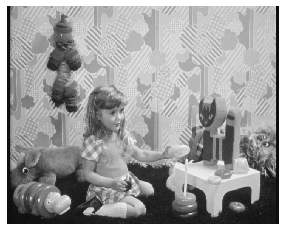

In [24]:
#正确显示灰度图像
o = cv2.imread("image\\girl.bmp")
q = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
plt.figure("灰度图像")
plt.imshow(q,cmap = plt.cm.gray),plt.axis('off')


(<matplotlib.image.AxesImage at 0x20005be2b00>, (-0.5, 511.5, 511.5, -0.5))

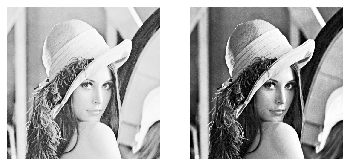

In [25]:
img = cv2.imread("image\\equ.bmp",cv2.IMREAD_GRAYSCALE)
#直方图均衡化处理
equ = cv2.equalizeHist(img)
plt.subplot(1,2,1)
plt.imshow(img,cmap = plt.cm.gray),plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(equ,cmap = plt.cm.gray),plt.axis('off')

使用不同参数，显示灰度图像

(<matplotlib.image.AxesImage at 0x20004887390>, (-0.5, 239.5, 239.5, -0.5))

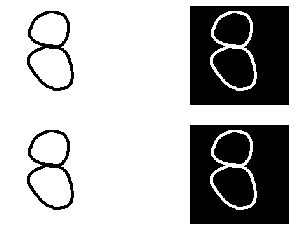

In [30]:
o = cv2.imread('image\\8.bmp')
g = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
plt.subplot(221),plt.imshow(g,cmap = plt.cm.gray),plt.axis('off')
plt.subplot(222),plt.imshow(g,cmap = plt.cm.gray_r),plt.axis('off')
plt.subplot(223);plt.imshow(g,cmap = 'gray'),plt.axis('off')
plt.subplot(224);plt.imshow(g,cmap = 'gray_r'),plt.axis('off')